 : البيانات موجودة في هذا الرابط من موقع كاقل

https://www.kaggle.com/ninzaami/loan-predication

أهلاً بكم في هذا التمرين لتعلم الانحدار الوجيستي, سنعمل معا على بيانات احد البنوك و نتوقع اذا كان العميل سوف يسدد القرض ام لا 

سنقوم أولاً بإحضار المكتبات اللازمة

In [1]:
import pandas as pd
import numpy as np

# قراءة البيانات

In [2]:
data = pd.read_csv('../data/loan.csv')

In [3]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# تجهيز البيانات

In [5]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

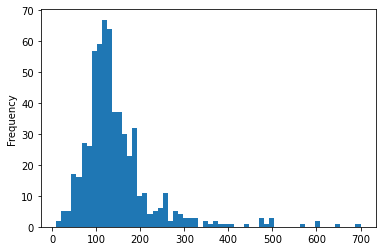

In [6]:
data['LoanAmount'].plot.hist(bins=60); # -1

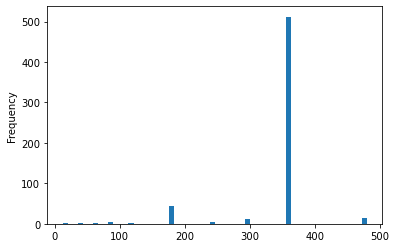

In [7]:
data['Loan_Amount_Term'].plot.hist(bins=60); # -1

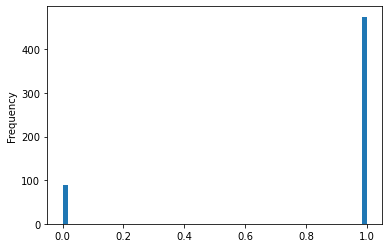

In [8]:
data['Credit_History'].plot.hist(bins=60); # -1

In [9]:
num_cols_to_fillna = ['Credit_History', 'Loan_Amount_Term', 'LoanAmount']

for col in num_cols_to_fillna:
    data[col].fillna(-1, inplace=True)

In [10]:
cat_cols_to_fillna = ['Gender', 'Married', 'Dependents', 'Self_Employed',]

for col in cat_cols_to_fillna:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [11]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# تحويل البيانات الفئوية الى رقمية

In [12]:
data['Gender'].replace('Male', 1, inplace=True)
data['Gender'].replace('Female', 0, inplace=True)

data['Married'].replace('Yes', 1, inplace=True)
data['Married'].replace('No', 0, inplace=True)

data['Education'].replace('Graduate', 1, inplace=True)
data['Education'].replace('Not Graduate', 0, inplace=True)

data['Self_Employed'].replace('Yes', 1, inplace=True)
data['Self_Employed'].replace('No', 0, inplace=True)

data['Loan_Status'].replace('Y', 1, inplace=True)
data['Loan_Status'].replace('N', 0, inplace=True)

In [13]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,-1.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1


## تقسيم البيانات

In [14]:
to_dummies = ['Dependents', 'Property_Area']

for col in to_dummies:
    new_cols = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, new_cols], axis=1)
    data.drop(columns=[col], axis=1, inplace=True)

In [15]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,1,0,5849,0.0,-1.0,360.0,1.0,1,1,0,0,0,0,0,1
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,LP001008,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


# تجهيز و بناء النموذج

In [16]:
y = data['Loan_Status'] # متغير الاستجابة
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1) # متغيرات التنبؤ

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
preds = model.predict(X_test)

# تقييم النموذج

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.6935483870967742